In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import tensorflow as tf
import keras

# Preprocessing and performance metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Classification algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Activation

# Retrieving abstract and title embeddings from pickle files
with open('abstract_10000.pkl', 'rb') as f:
    abstract_10000 = pickle.load(f)

with open('title_list.pkl', 'rb') as f:
    title_list = pickle.load(f)

Using TensorFlow backend.


In [2]:
# Converting torch tensors to numpy arrays

abstract_10000_np = list(map(lambda x: x.cpu().detach().numpy(), abstract_10000))

In [3]:
# Extracting labels from K means clustering algorithm

X = np.array(abstract_10000_np)
y = []

# Finding labels with k means clustering

km = KMeans(n_clusters=10,random_state=100)
km.fit(X)
y.append(km.labels_)
y = np.array(y).T

In [4]:
# Creating a dataframe with text and labels
df = pd.DataFrame(index=title_list,columns=['k=10'],data=y)
df.head()

,k=10
electronic structure of single and multipleshell carbon fullerenes,3
recursion and pathintegral approaches to the analytic study of the electronic properties of,8
phonon transmission rate fluctuations and localization in random semiconductor superlattices greens function approach,9
phonon universal transmission fluctuations and localization in semiconductor superlattices with a controlled degree of order,6
the effect of monomer evaporation on a simple model of submonolayer growth,8


In [5]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Support Vector Classifier

C:\Users\WorkPC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       369
           1       0.87      0.88      0.87       328
           2       0.79      0.73      0.76        26
           3       0.80      0.83      0.81       428
           4       0.87      0.82      0.84       324
           5       0.88      0.83      0.85       305
           6       0.86      0.81      0.84       267
           7       0.88      0.89      0.88       549
           8       0.82      0.86      0.84       351
           9       0.86      0.92      0.89       353

    accuracy                           0.86      3300
   macro avg       0.85      0.84      0.85      3300
weighted avg       0.86      0.86      0.86      3300



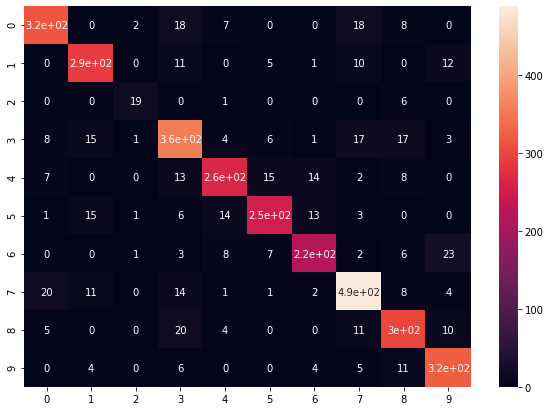

In [7]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))

df_cm = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Logistic Regression

C:\Users\WorkPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WorkPC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WorkPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.59      0.60      0.59       369
           1       0.58      0.55      0.56       328
           2       0.93      0.50      0.65        26
           3       0.46      0.44      0.45       428
           4       0.62      0.62      0.62       324
           5       0.63      0.56      0.59       305
           6       0.61      0.66      0.63       267
           7       0.65      0.67      0.66       549
           8       0.55      0.58      0.57       351
           9       0.67      0.71      0.69       353

    accuracy                           0.60      3300
   macro avg       0.63      0.59      0.60      3300
weighted avg       0.60      0.60      0.60      3300



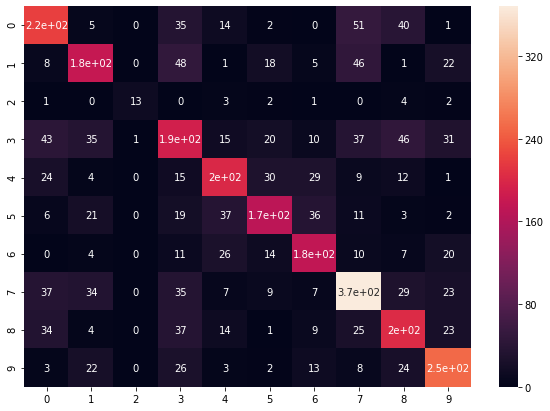

In [8]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))

df_cm = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

DNN

In [9]:
# Building a sequential model with keras
model = Sequential()
model.add(Dense(4196, activation='relu', input_dim=4196))
model.add(Dense(2148, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Converting labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train)

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True, verbose=0)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       369
           1       0.68      0.92      0.78       328
           2       0.82      0.88      0.85        26
           3       0.81      0.66      0.73       428
           4       0.88      0.76      0.82       324
           5       0.80      0.84      0.82       305
           6       0.78      0.85      0.81       267
           7       0.77      0.84      0.80       549
           8       0.81      0.76      0.79       351
           9       0.86      0.78      0.82       353

    accuracy                           0.80      3300
   macro avg       0.81      0.81      0.80      3300
weighted avg       0.81      0.80      0.80      3300



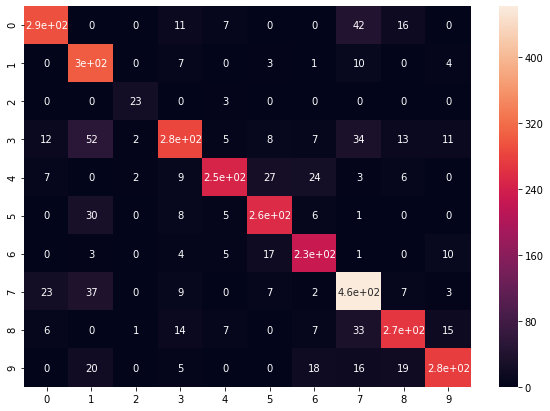

In [16]:
y_test = keras.utils.to_categorical(y_test)

predictions = model.predict_classes(X_test)

print(classification_report(y_test.argmax(axis=1),predictions))

# confusion matrix for predictions
df_cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1),predictions))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)